<a href="https://colab.research.google.com/github/NeoLeMarc/colab/blob/main/ZeroToHero04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# download data
!wget --no-check-certificate \
  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip -O /tmp/rps.zip

!wget --no-check-certificate \
  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip -O /tmp/rps-test-set.zip

--2021-05-28 18:42:14--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.128, 142.250.141.128, 2607:f8b0:4023:c03::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  93.4MB/s    in 2.0s    

2021-05-28 18:42:16 (93.4 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2021-05-28 18:42:16--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 2607:f8b0:4023:c06::80, 2607:f8b0:4023:c0b::80
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [applicatio

In [ ]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [ ]:
import tensorflow as tf
TRAINING_DIR = "/tmp/rps/"
training_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

training_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150, 150),
    class_mode = 'categorical'
)

VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150, 150),
    class_mode = 'categorical'
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape = (150, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # Flatten the results to feed into a DNN
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.5),
                                    # 512 neuron hidden layer
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    tf.keras.layers.Dense(3, activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit_generator(training_generator, epochs=25, 
                              validation_data = validation_generator,
                              verbose = 1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
79/79 [==============================] - 42s 129ms/step - loss: 0.6222 - accuracy: 0.7321 - val_loss: 1.0188 - val_accuracy: 0.7634
Epoch 2/25
79/79 [==============================] - 9s 119ms/step - loss: 0.0942 - accuracy: 0.9718 - val_loss: 1.1695 - val_accuracy: 0.7984
Epoch 3/25
79/79 [==============================] - 10s 124ms/step - loss: 0.0659 - accuracy: 0.9929 - val_loss: 1.6572 - val_accuracy: 0.7285
Epoch 4/25
79/79 [==============================] - 9s 119ms/step - loss: 0.0121 - accuracy: 0.9956 - val_loss: 2.7595 - val_accuracy: 0.7527
Epoch 5/25
79/79 [==============================] - 9s 119ms/step - loss: 0.0267 - accuracy: 0.9952 - val_loss: 2.2469 - val_accuracy: 0.8065
Epoch 6/25
79/79 [==============================] - 9s 120ms/step - loss: 0.0075 - accuracy: 0.9984 - val_loss: 1.8967 - val_accuracy: 0.8468
Epoch 7/25
79/79 [==============================] - 9s 120ms/step - loss: 1.2249e-06 - accuracy: 1.0000 - val_loss: 1.8204 - val_accuracy: 0.8468


In [ ]:
model.save("rps.h5")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
from keras.preprocessing import image




In [ ]:
uploaded = files.upload()

Saving 20210528_152511.jpg to 20210528_152511 (2).jpg
Saving 20210528_152513.jpg to 20210528_152513 (1).jpg
Saving 20210528_152504.jpg to 20210528_152504 (1).jpg


20210528_152511.jpg
[[0. 1. 0.]]
Rock


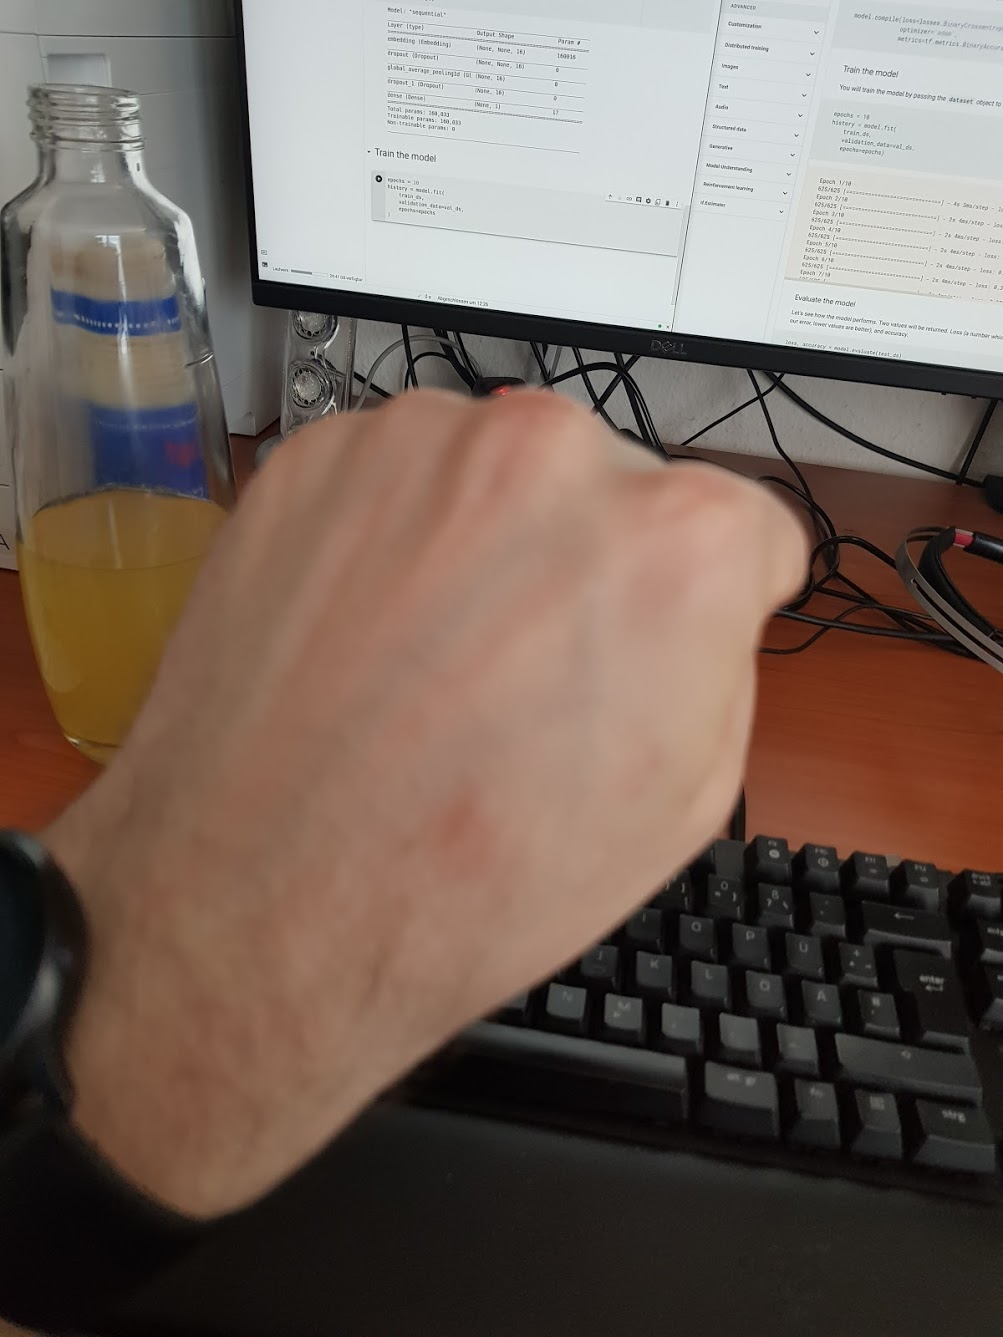

20210528_152513.jpg
[[0. 1. 0.]]
Rock


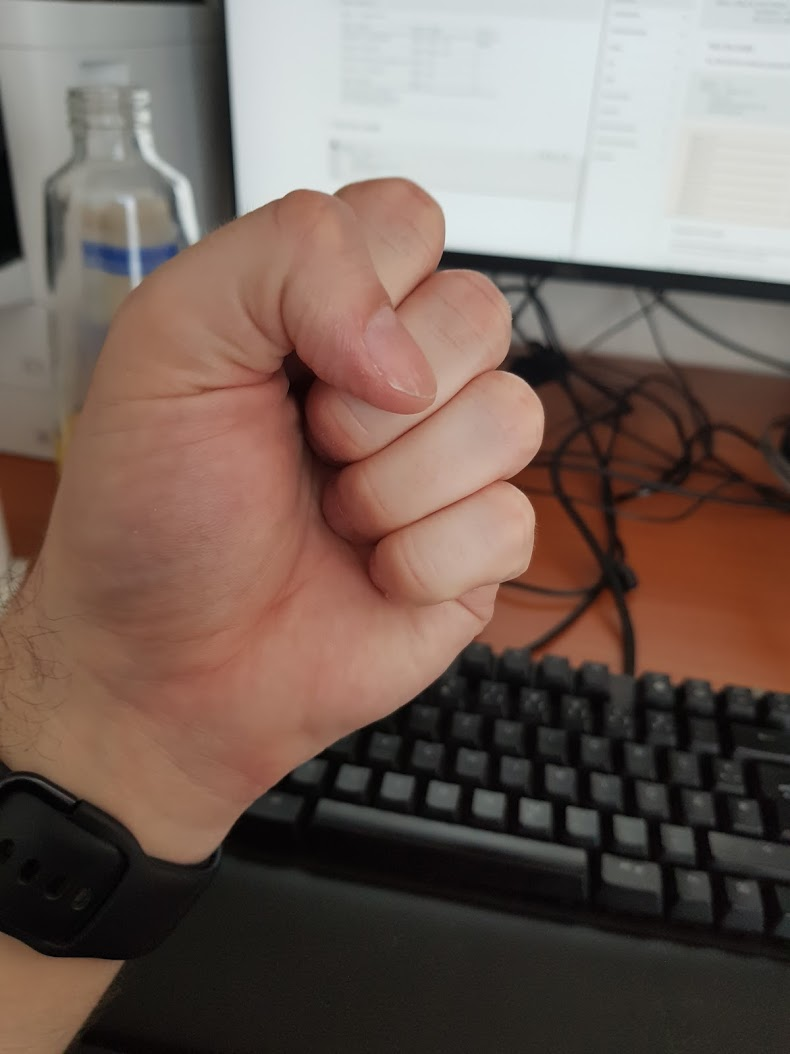

20210528_152504.jpg
[[0. 0. 1.]]
Scissor


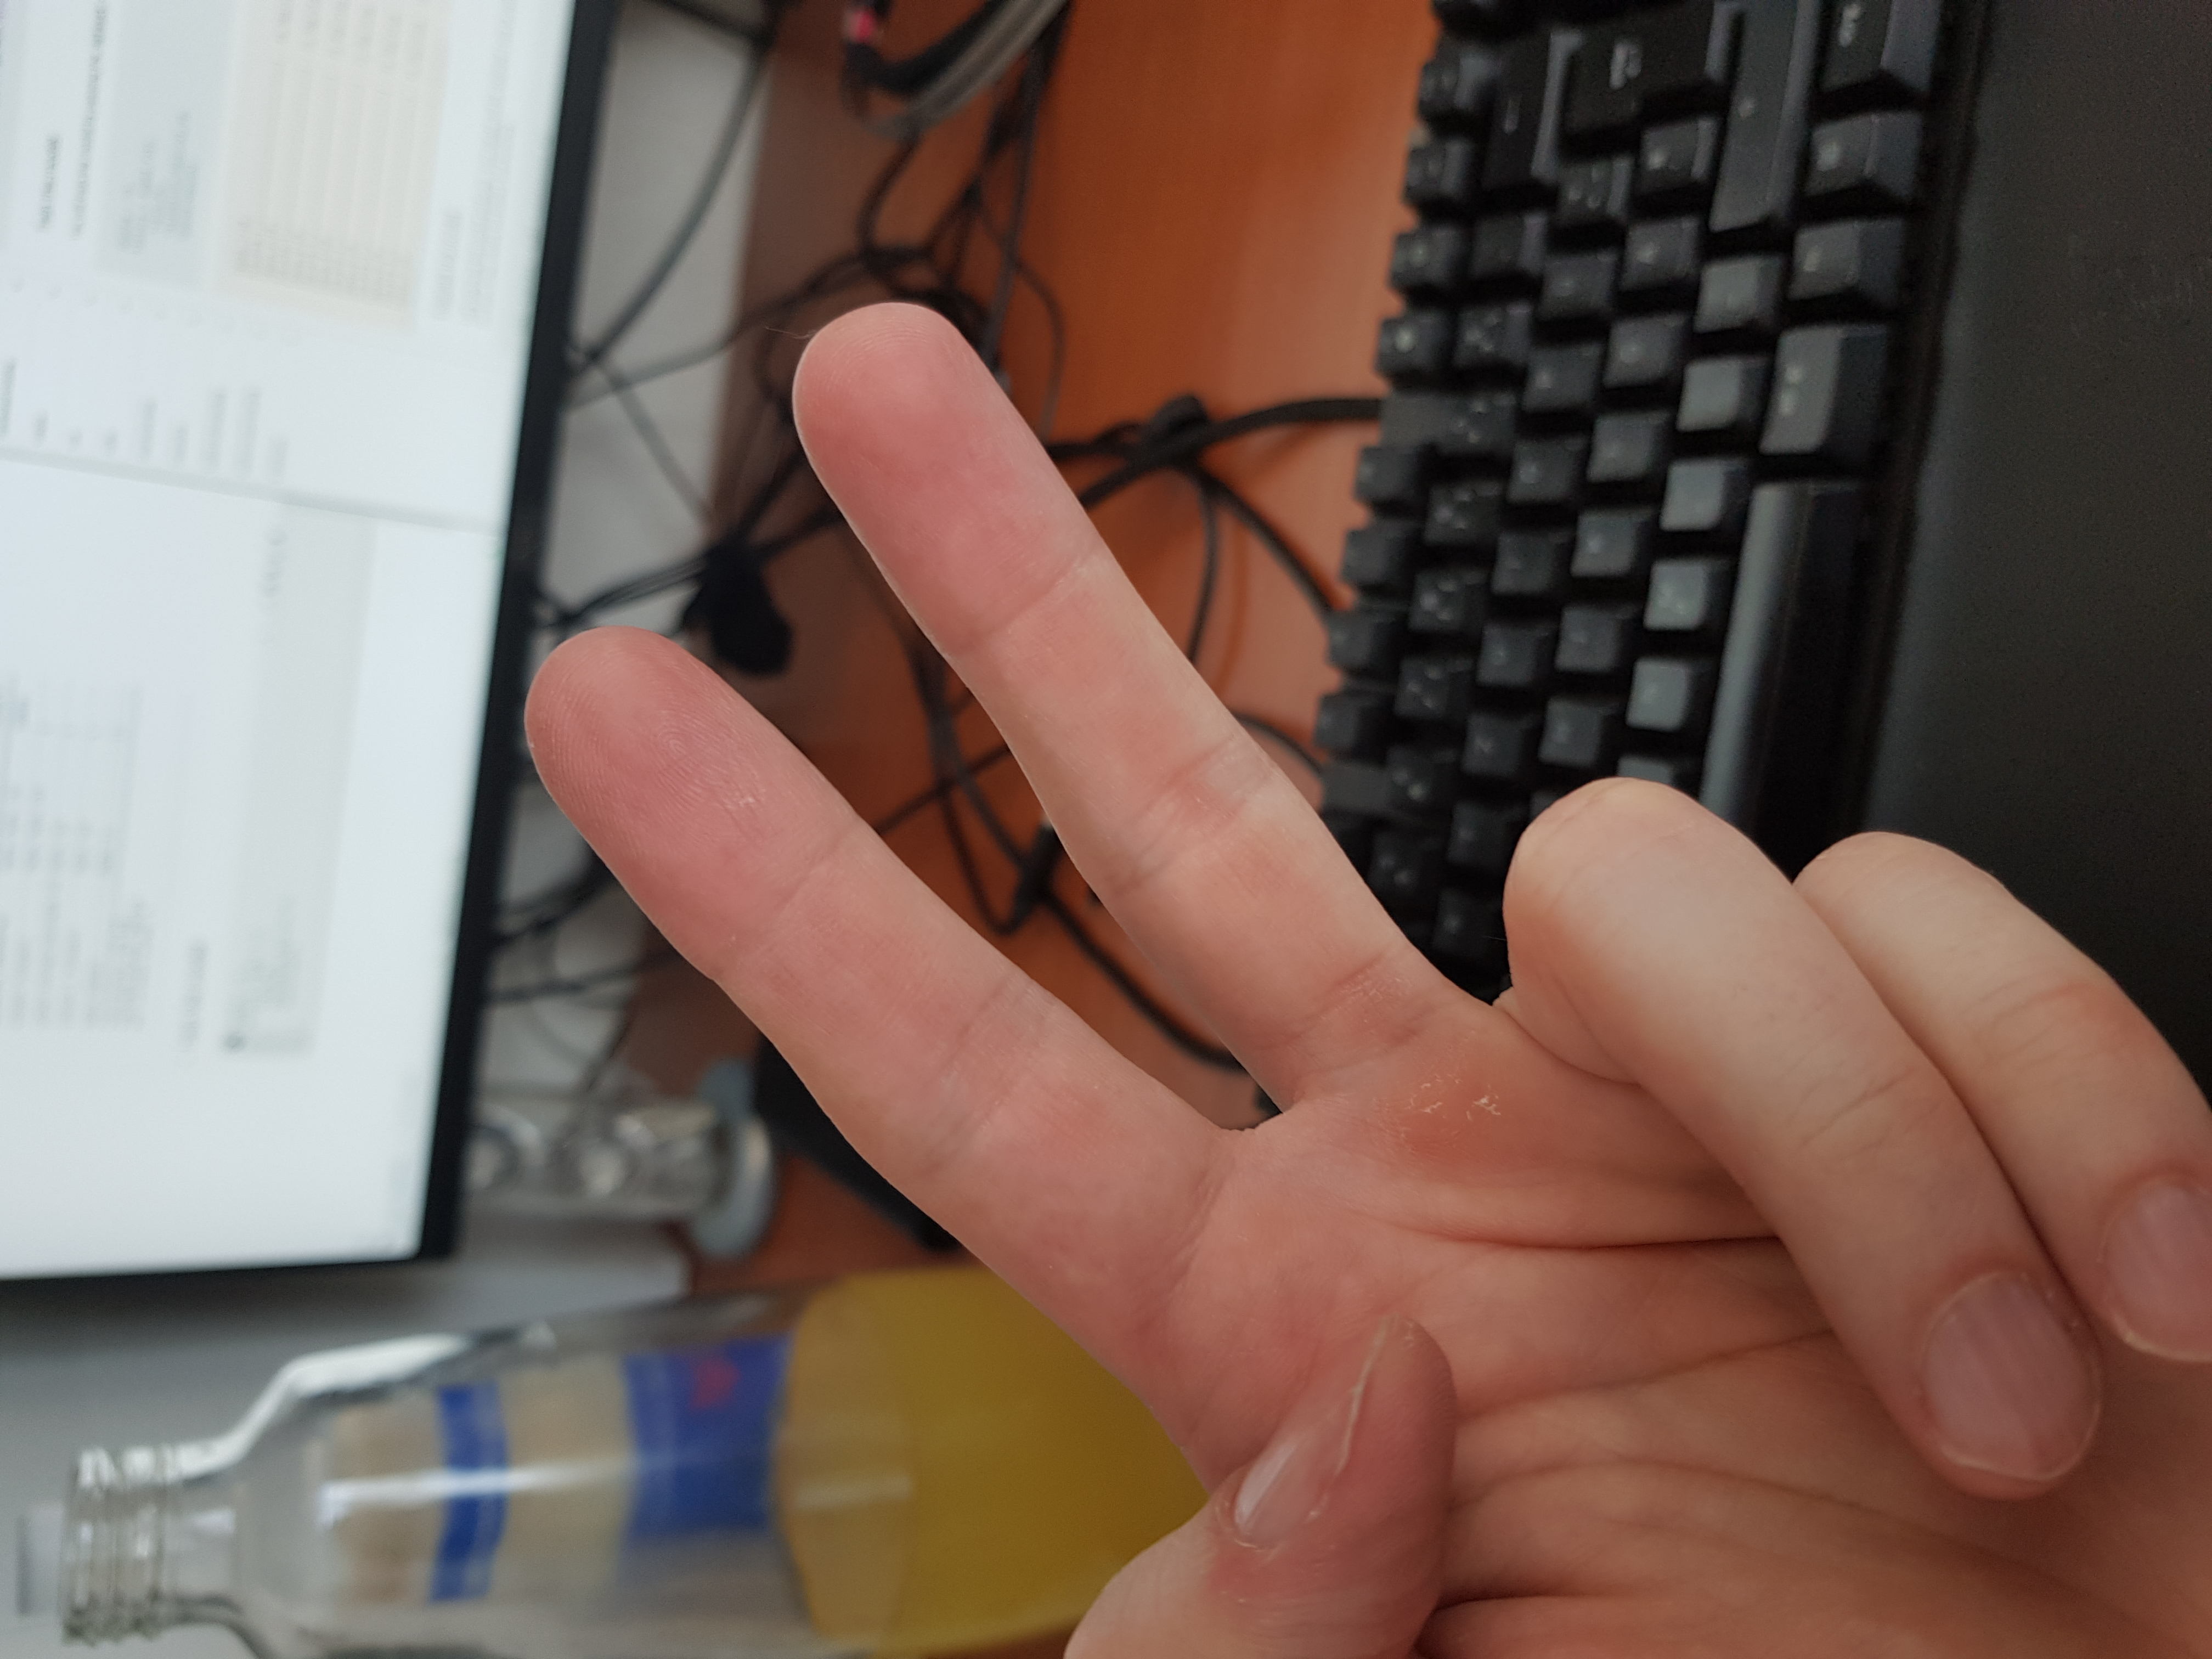

In [30]:
def show(img):
  plt.figure()
  plt.imshow(img)
  plt.colorbar()
  plt.grid(False)
  plt.show()

def jshow(img):
  from IPython.display import Image
  display(Image(filename=img, height=100))
  
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

  i = 0
  for c in classes:
    i += 1
    if c[0] == 1:
      print("Paper")
    elif c[1] == 1:
      print("Rock")
    elif c[2] == 1:
      print("Scissor")
    jshow(fn)
